In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
img_path='/content/drive/MyDrive/SM_Interaction/LMP/computer_vision/Computer_Vision_data/'
data_set='Datasets/jones_gabriel.zip'
final_data_set= img_path + data_set
final_data_set
zip_object = zipfile.ZipFile(file=final_data_set, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
import os
from PIL import Image
import numpy as np
def get_image_data():
    paths = [os.path.join('/content/jones_gabriel',f) for f in os.listdir('/content/jones_gabriel')]
    faces=[]
    ids=[]
    for path in paths:
        image =Image.open(path).convert('L')
        image_np = np.array(image,'uint8')
        id= int(path.split('.')[1])
        ids.append(id)
        faces.append(image_np)
        return np.array(ids),faces

In [5]:
ids, faces = get_image_data()

In [6]:
import cv2
lbph_classifier =cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

In [7]:
image = Image.open('/content/jones_gabriel/person.1.1.jpg')
image.size

(220, 220)

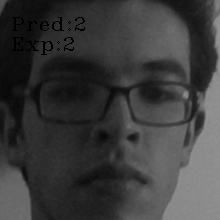

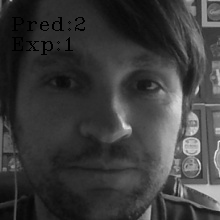

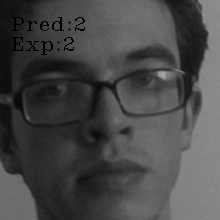

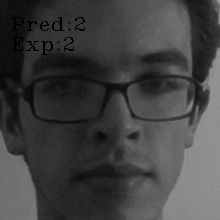

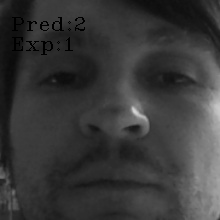

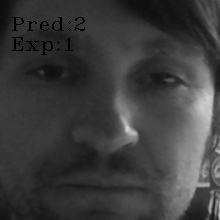

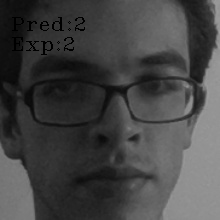

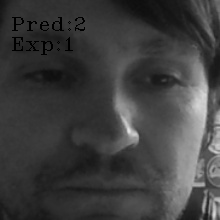

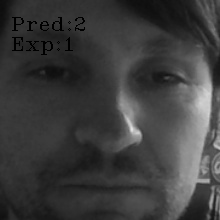

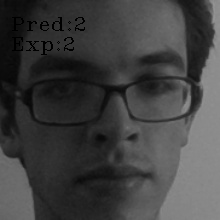

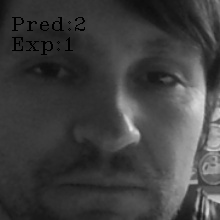

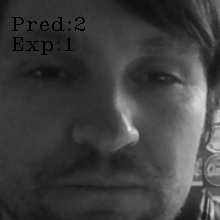

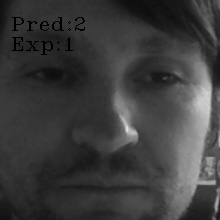

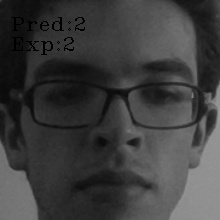

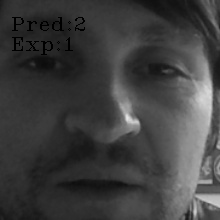

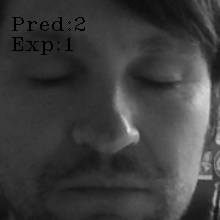

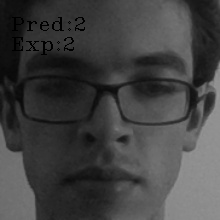

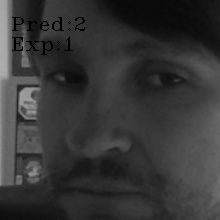

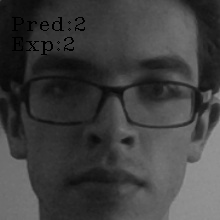

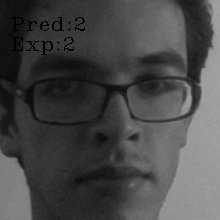

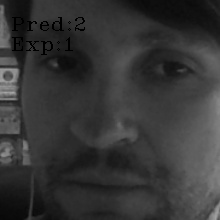

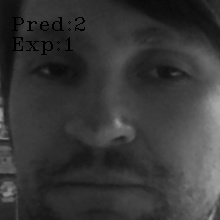

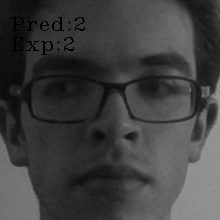

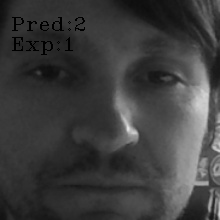

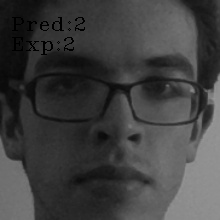

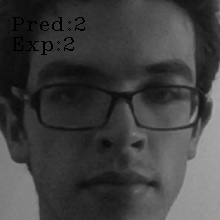

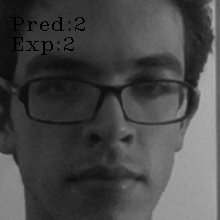

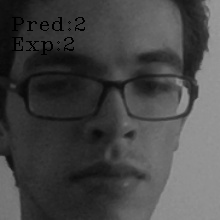

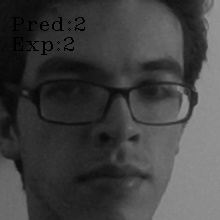

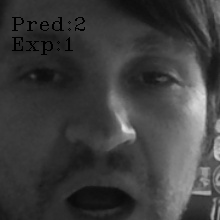

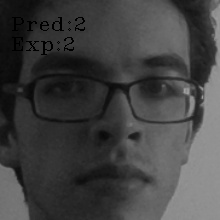

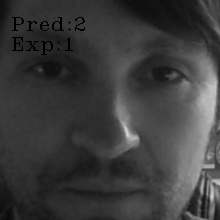

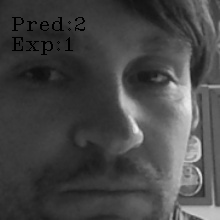

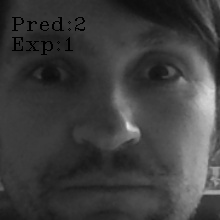

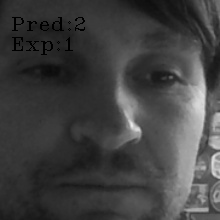

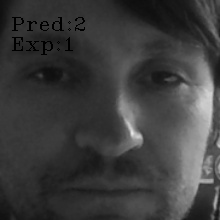

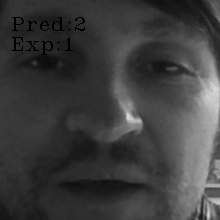

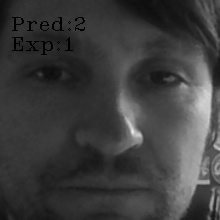

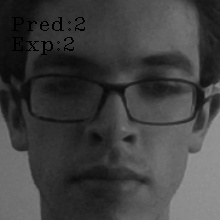

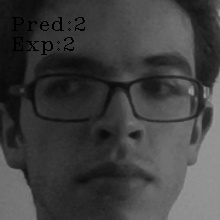

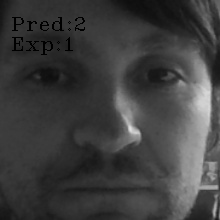

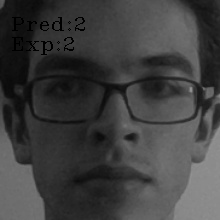

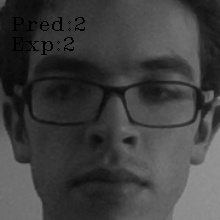

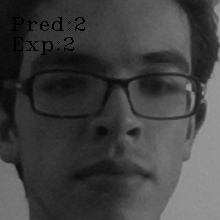

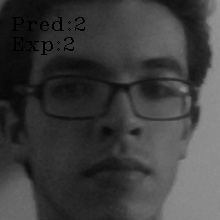

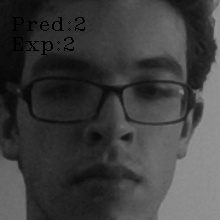

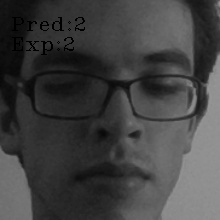

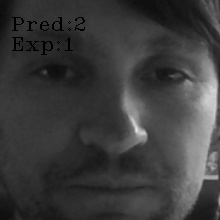

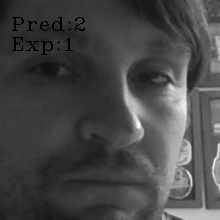

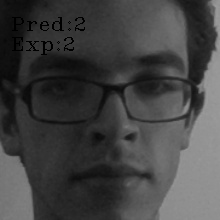

In [8]:
from google.colab.patches import cv2_imshow
paths = [os.path.join('/content/jones_gabriel',f) for f in os.listdir('/content/jones_gabriel')]
for path in paths:
    image=Image.open(path).convert('L')
    image_np = np.array(image,'uint8')
    prediction, _ = lbph_classifier.predict(image_np)
    expected_output = int(path.split('.')[1])
    cv2.putText(image_np,'Pred:'+str(prediction),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    cv2.putText(image_np,'Exp:'+str(expected_output),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    cv2_imshow(image_np)